<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**English to Hindi Translation using Encoders and Decoders**</center>

## **Table of Contents**

1. [**Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section2)<br>
 - 2.1 [**Installing Libraries**](#Section21)<br>
 - 2.2 [**Upgrading Libraries**](#Section22)<br>
 - 2.2 [**Importing Libraries**](#Section23)<br>
3. [**Loading Data**](#Section3)<br>
4. [**Data Acquistition and Description**](#Section4)<br>
5. [**Data Exploration**](#Section5)<br>
  - 5.1 [**Data Preprocessing**](#Section501)<br>
  - 5.2 [**Exploratory Data Analysis**](#Section502)<br>
6. [**Data PostProcessing and Feature Engineering**](#Section6)<br>
7. [**Model Building**](#Section7)<br>
8. [**Test set**](#Section8)<br>
9. [**Conclusion**](#Section9)<br>

---
<a name=Section1></a>
# **1. Problem Statement**
---

- **Natural Language Processing** in **Artificial Intelligence** is the application of computational techniques to the analysis and synthesis of natural language and speech.

- In this project the objective is **to deliver the hindi translation of the english text** that has been given in the dataset.

<center><img src="https://www.techrounder.com/wp-content/uploads/2020/11/english-hindi-translation.jpg" height= 400 width=1000 ></center>

# **Scenario:**

- You are working as a **NLP Engineer** in a technical start-up who have onboarded this project from one of their clients.

- Your objective is to deliver the **Best fit model** as per the project deliverables are concerned.

- You are supposed to deliver **Quality** in terms of making this case study.

- The evaluation metric for this problem statement is set as **Accuracy.**

<a id=section2></a>

---
# **2.Installing & Importing Libraries**
---

---
<a name = Section21></a>
### **2.1 Installing Libraries**
---

In [ ]:
# import sys                                                          # Importing System
# !{sys.executable} -m pip install -U pandas-profiling[notebook]      # Installing pandas profiling
# !jupyter nbextension enable --py widgetsnbextension                 # enabling python notebook extention

In [ ]:
# !pip install -q datascience                                         # Package that is required by pandas profiling
# !pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# !pip install -q catboost                                            # Installing Catboost 
# !pip install -q xgboost                                             # Installing XGBoost
# !pip install pandas==0.19.2                                         # Installing stable version of pandas    

---
<a name = Section22></a>
### **2.2 Upgrading Libraries**
---
- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (2.1) and below (2.2) again after restarting the runtime.

In [ ]:
# !pip install pandas-profiling -q --upgrade                         # upgrading pandas profiling

---
<a name = Section23></a>
### **2.3 Importing Libraries**
---

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                             # Importing for panel data analysis
from pandas_profiling import ProfileReport                                      # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                                      # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                                     # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                                         # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                  # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)                     # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                              # Importing package numpys (For Numerical Python)
from datetime import datetime as dt                                             # For datetime funcationality
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                 # Importing pyplot interface of matplotlib
import seaborn as sns                                                           # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.express as ex                                                     # Importing Plotly Express for Dynamic Plotting
import plotly.graph_objs as go                                                  # Importing Plotly graphs for Dynamic Plotting
import plotly.offline as pyo                                                    # Importing offline Express for Dynamic Plotting
from plotly.subplots import make_subplots                                       # Importing Plotly Subplots to plot Dynamic subplots
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                 # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                               # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.figure_factory as ff                                              # Calling the figure factory to create unique chart types
#-------------------------------------------------------------------------------------------------------------------------------
import configparser                                                             # Importing Configparser for modifying configration of the script
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV              # Importing GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer,f1_score,recall_score   # Importing KPI's(Key Perfromence Indicators or Performence metrics) 
#-------------------------------------------------------------------------------------------------------------------------------
import os                                                                       # Importing OS  
import string                                                                   # Importing Striong     
from string import digits                                                       # Importing digits 
import re                                                                       # Importing Regular Expressions 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.utils import shuffle                                               # Importing shuffle                
from keras.layers import Input, LSTM, Embedding, Dense                          # Importing i/p , LSTM, Embedding and Dense Layers
from keras.models import Model                                                  # Importing models

---
<a id=section3></a>
# **3. Loading Data**
---

In [ ]:
data =pd.read_csv("../input/hindienglish-corpora/Hindi_English_Truncated_Corpus.csv",encoding='utf-8')
print("Data Shape is:", data.shape)
data.head()

Data Shape is: (127607, 3)


,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,indic2012,This percentage is even greater than the percentage in India.,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called Upanishad.,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


<a id=section4></a>

---
# **4. Data Acquistition and Description**
---


---
<a name = Section41></a>
### **4.1 Data Description**
---
- In this section we will get **information about the data** and see some observations.

The following is the description of the entire dataset. For reference you can visit <a href="https://www.kaggle.com/aiswaryaramachandran/hindienglish-corpora">**here**</a>. 

<br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 127607 | 3 | 41.4 MB| 

<br>

|**Serial**|**Name of the Feature**|**Description**|
| :-- | :-- | :-- |
|1|Source| Three types of sources are there ted, tides and indic2012|
|2|english_sentence| Sentences in english|
|3|hindi_sentence| translation of hindi formed from sentences in english|

In [ ]:
data.describe()

,source,english_sentence,hindi_sentence
count,127607,127605,127607
unique,3,124317,97662
top,tides,(Laughter),(हँसी)
freq,50000,555,212


### **Observation:**

- There are total **3 unique catetgories** for **source**.

- **tides** has the highest freq of **50000**.

- **124317** datapoints are unique for **english_sentence**.

- **97662** datapoints are unique for **hindi_sentence**.

---
<a name = Section42></a>
### **4.2 Data Information**
---
- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127607 entries, 0 to 127606
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source            127607 non-null  object
 1   english_sentence  127605 non-null  object
 2   hindi_sentence    127607 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


### **Observations:**

- All the three features are of **object** data-type.

- For this data there is no need to check **data inconsistancy**.

<a name = Section5></a>

---
# **5. Data Exploration**
---

---
<a name = Section51></a>
### **5.1 Pre Profiling Report**
---
- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# # Making Pre-profiling report for train data
# profile = ProfileReport(data)
# # profile.to_file(output_file='Pre_Profiling_Report.html')
# print('Accomplished!')
# profile

### **Observations:**

- **50,000 source** datapoints **tides** categorized as **tides**.

- **39,881 source** datapoints **tides** categorized as **ted**.

- **37,726 source** datapoints **tides** categorized as **indic2012**

- Though **other values** have the highest freq however, **laughter** has distictly appeared most of the times.

- Though **other values** have the highest freq however, **(हँसी)**  has distictly appeared most of the times.  

- **english_sentence** has 2 null values.

- We can treat the following feature(s) with the solution given for our further analysis.

<br>

|Feature|Data Type|Missing Count|Solution
|:--:|:--:|:--:|:--|
english_sentence | object | 2 | Treat with logical NOT replacement. | Train Data |


---
<a name = Section51></a>
## **5.1 Data Preprocessing**
---
- Here, we will check if there are any **missing values** or **data inconsistancy** in the dataset and then we will tune our data accordingly.

In [ ]:
# Replacing missing values using logical NOT. 
data=data[~pd.isnull(data['english_sentence'])]

In [ ]:
data.isnull().sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

### **Observations:**

- Since there are no missing values, and the data is in correct format we can now proceed with the EDA.

---
<a name = Section51></a>
## **5.3 Exploratory Data Analysis**
---
- Here we will check what **insights** can be derived from each feature and** how does one feature effects another.**

**<h4>Question:** What insights can be drawn from **source**?</h4>

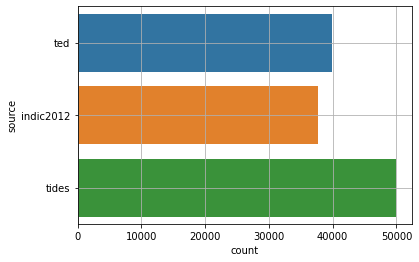

In [ ]:
sns.countplot(y=data['source'])
plt.grid(b=True)
plt.show()

**Observations:**

- The maximum number of records for **source** is registered under thhe category **tides**.

- The highest freqeuncy for **tides** is nearly **4000**.

- The minimum number of records for **source** is registered under thhe category **indic2012**.

- The highest freqeuncy for **indic2012** lies in between **2500 to 3000**.

**<h4>Question:** What is the relation in between **length of english_sentences** and **length of hindi_sentences?** </h4>


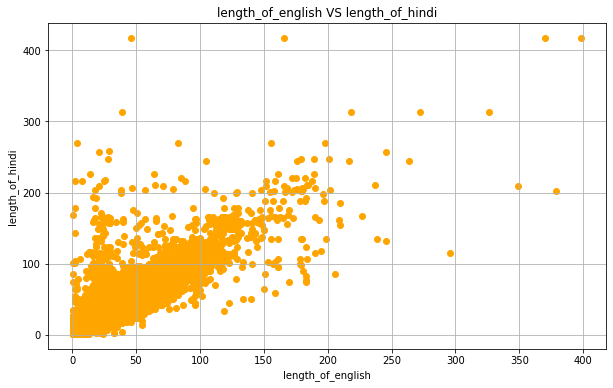

In [ ]:
# Defining the english sentence length and hindi sentence length
length_of_english = data['english_sentence'].apply(lambda x:len(x.split(" ")))
length_of_hindi = data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

# Plotting the plots
plt.figure(figsize=(10,6))
plt.title('length_of_english VS length_of_hindi')
plt.scatter(length_of_english,
            length_of_hindi,
            c='orange')
plt.xlabel('length_of_english')
plt.ylabel('length_of_hindi')
plt.grid()
plt.show()

**Observations:**

- Most of the datapoints have have **<50 words**.

- As the length of the **english sentence increases** so does the **length of the hindi sentence.**

- Sentences with **word count>=100** are very less and hencem they can be avoided.

**<h4>Question:** What is the relation in between **source** and **length of english sentences**? </h4>


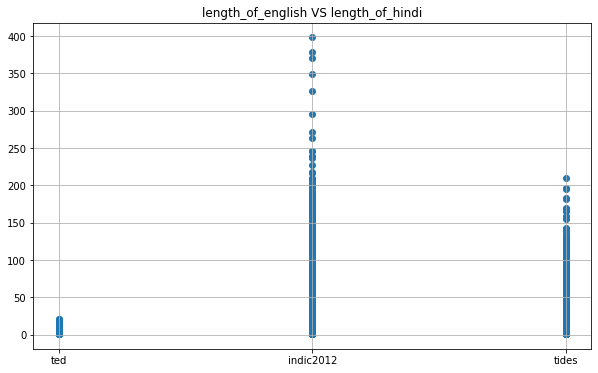

In [ ]:
# Making a new dataframe
length_of_english = data['english_sentence'].apply(lambda x:len(x.split(" ")))
length_of_hindi = data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

# Making a new dataframe
plt.figure(figsize=(10,6))
plt.title('length_of_english VS length_of_hindi')
plt.scatter(data['source'],length_of_english)
plt.grid()
plt.show()

**Observations:**

- **Indic2012** has the records for most of the **english_sentences**.

- The **highest length** of an english sentence is also found under the class name **indic2012** for **source**.

- **ted** holds the least number of records for **english_sentences**.

- The **lowest length** of an english sentence is also found under the class name **ted** for **source**.


**<h4>Question:** What is the relation in between **source** and **length of hindi sentences**? </h4>


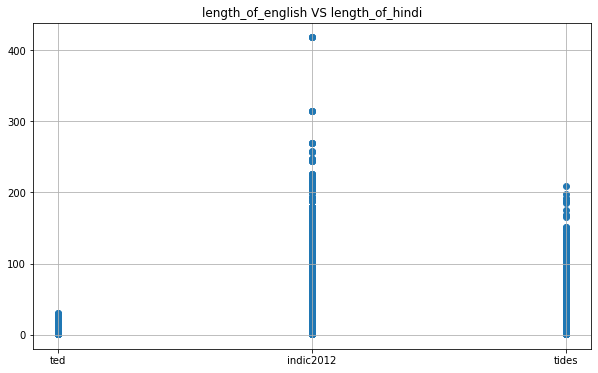

In [ ]:
# Defining the length of hindi words
length_of_hindi = data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

# Plotting the figure
plt.figure(figsize=(10,6))
plt.title('length_of_english VS length_of_hindi')
plt.scatter(data['source'],length_of_hindi)
plt.grid()
plt.show()

**Observations:**

- The **highest length** of an **hindi sentence** is found under the class name **indic2012** for **source**.

- The **lowest length** of a hindi sentence is found under the class name **ted** for **source**.

- Hence, we will be considering only **ted** for the **source**.

<a id=section6></a>

---
# **8 Data Post Processing**
---

<a id=section51></a>

---
## **8.1 Data cleaning**
---

- Here we will extract new information from the features and format the data accordingly.

In [ ]:
# Shrinking the dataset in order to avoid any overfitting.
data=data[data['source']=='ted']

# Dropping duplicates
data.drop_duplicates(inplace=True)

# Sampling out 25000 datapoints
data=data.sample(n=25000,random_state=42)

# Lowercase all characters
data['english_sentence']=data['english_sentence'].apply(lambda x: x.lower())
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: x.lower())

# Remove quotes
data['english_sentence']=data['english_sentence'].apply(lambda x: re.sub("'", '', x))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

# Set of all special characters
exclude = set(string.punctuation)

# Remove all the special characters
data['english_sentence']=data['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
data['english_sentence']=data['english_sentence'].apply(lambda x: x.translate(remove_digits))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: x.translate(remove_digits))

data['hindi_sentence'] = data['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

# Remove extra spaces
data['english_sentence']=data['english_sentence'].apply(lambda x: x.strip())
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: x.strip())
data['english_sentence']=data['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))


# Add start and end tokens to target sequences
data['hindi_sentence'] = data['hindi_sentence'].apply(lambda x : 'START_ '+ x + ' _END')


### Get English and Hindi Vocabulary
all_eng_words=set()
for eng in data['english_sentence']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in data['hindi_sentence']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

print('The length of all the english words are:', len(all_eng_words))
print('The length of all the hindi words are:', len(all_hindi_words))

The length of all the english words are: 14030
The length of all the hindi words are: 17540


<a id=section51></a>

---
## **8.2 Feature genaration**
---

- Here we will come up with new features from the existing features of our data.

In [ ]:
data['length_eng_sentence']=data['english_sentence'].apply(lambda x:len(x.split(" ")))
data['length_hin_sentence']=data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [ ]:
# Putting a threshold to 20 words and
data=data[data['length_eng_sentence']<=20]
data=data[data['length_hin_sentence']<=20]

<a id=section51></a>

---
## **8.3 Feature encoding**
---
- Here, we will encode our data into proper machine level language.

In [ ]:
# Defining the maximum length for source and target
max_length_src=max(data['length_hin_sentence'])
max_length_tar=max(data['length_eng_sentence'])

In [ ]:
print(max_length_src)

20


In [ ]:
# Making input and target words
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(14030, 17540)

In [ ]:
#Apply zero padding
num_decoder_tokens += 1 
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())
data = shuffle(data)
data.head(10)

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
25332,ted,makes you smile very often,START_ आपको भी मुस्कुराने पर मजबूर कर देते हैं _END,5,10
71092,ted,so where i started was with connection,START_ तो मेंने जहाँ से शुरुआत की वो था संपर्क। _END,7,11
2980,ted,so for example in iraq you know the war zone,START_ तो उदाहरण के लिए इराक में आप जानते है युद्ध क्षेत्र _END,10,13
74189,ted,with the mindset to create change,START_ जो बदलाव लाने के लिये मानसिक रूप से प्रतिबद्ध हैं। _END,6,12
91153,ted,or where you can trash the cup,START_ या कहाँ मैं कप को फ़ेंक सकता हूँ । _END,7,11
120030,ted,you can have million families or take things out of the suburbs,START_ आप लाख परिवारों को उपनगरों के बाहर ला सकते हैं _END,12,12
85425,ted,of men wanting a certificate,START_ आदमियों की एक प्रमाणपत्र चाहिये। _END,5,7
122102,ted,and ultimately it seems to me,START_ और अंत में जैसा की मैं देख रहा हु _END,6,11
27705,ted,if the flag was where that cross was in a small square environment,START_ अगर फ्लैग वहाँ पर था जहाँ पर क्रॉस था एक छोटे वर्गाकार वातावरण में _END,13,16
84265,ted,that failure is not an option,START_ कि विफलता एक विकल्प नहीं है _END,6,8


<a id=section51></a>

---
## **8.4 Feature Extraction**
---

- Here we will make our data in a format that our model is able to understand.

In [ ]:
# Defining features and Target from Training data for training and validation 
X, y = data['english_sentence'], data['hindi_sentence']

# Defining X_train, X_test , y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)
# Checking the shape
print('Train and test shape')
print('*'*50)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('*'*50)

Train and test shape
**************************************************
X_train.shape:  (19819,)
y_train.shape:  (19819,)
X_test.shape:  (4955,)
y_test.shape:  (4955,)
**************************************************


In [ ]:
# Saving the data into pickle files
X_train.to_pickle('x_train.pkl')
X_test.to_pickle('x_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

<a id=section7></a>

---
# **9. Model Building**
---


<a id=section7></a>

---
### **9.1 Separating data into batches for training**
---

- Here, first we will **make batches** in order to break the data into small number of pieces.

- After that we will setup the decoder that will **decode** the **encoded** data for us.

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

<a id=section7></a>

---
### **9.2 Encoder-Decoder Architecture**
---

- Here, we will define the architecture of the **encoder-decoder** model and train it with the genarated data. 

In [ ]:
# Defining the latent dimention of 300
latent_dim=300

In [ ]:
# Encoder Layer:
encoder_inputs = Input(shape=(None,))

# Embedding encoder
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)

# calling LSTM
encoder_lstm = LSTM(latent_dim, return_state=True)

# Genarating Encoder Outputs and respective states
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# Discarding `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

2021-11-10 06:43:30.507715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 06:43:30.508835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 06:43:30.509491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 06:43:30.510711: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
encoder_inputs

<KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_1')>

In [ ]:
enc_emb

<KerasTensor: shape=(None, None, 300) dtype=float32 (created by layer 'embedding')>

In [ ]:
encoder_lstm

In [ ]:
encoder_outputs, state_h, state_c

(<KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm')>)

In [ ]:
encoder_states

[<KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm')>]

In [ ]:
# Decoder Layer
# Settinf up decoder inputs, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)

# genarating decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Model Compilation
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    4209000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    5262300     input_2[0][0]                    
______________________________________________________________________________________________

<a id=section7></a>

---
### **9.3 Training the model**
---

- Here, we will train the model with the default parameters and then we will check the performence. 

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 30

In [ ]:
train_samples,val_samples

(19819, 4955)

In [ ]:
history = model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                              steps_per_epoch = train_samples//batch_size,
                              epochs=epochs,
                              validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                              validation_steps = val_samples//batch_size)

2021-11-10 06:43:35.232400: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2021-11-10 06:43:42.259390: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


154/154 [==============================] - 64s 363ms/step - loss: 3.0130 - val_loss: 2.8382
Epoch 2/30
154/154 [==============================] - 54s 350ms/step - loss: 2.7392 - val_loss: 2.6653
Epoch 3/30
154/154 [==============================] - 54s 353ms/step - loss: 2.5729 - val_loss: 2.5937
Epoch 4/30
154/154 [==============================] - 54s 350ms/step - loss: 2.4637 - val_loss: 2.5436
Epoch 5/30
154/154 [==============================] - 55s 356ms/step - loss: 2.3741 - val_loss: 2.5065
Epoch 6/30
154/154 [==============================] - 54s 353ms/step - loss: 2.2912 - val_loss: 2.4731
Epoch 7/30
154/154 [==============================] - 54s 351ms/step - loss: 2.2119 - val_loss: 2.4537
Epoch 8/30
154/154 [==============================] - 54s 350ms/step - loss: 2.1374 - val_loss: 2.4444
Epoch 9/30
154/154 [==============================] - 54s 352ms/step - loss: 2.0677 - val_loss: 2.4195
Epoch 10/30
154/154 [==============================] - 53s 349ms/step - loss: 2.0003

In [ ]:
model.save_weights('nmt_weights.h5')

<a id=section7></a>

---
### **9.4 Encoding the entire sequence**
---

- Here, we will encode the input sequence to get the thought vectors. 

In [ ]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)


<a id=section7></a>

---
### **9.5 Decoding the entire sequence**
---

- Here, we will decode the output sequence of the encoded data. 

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

<a id=section7></a>

---
# **9. Making Predictions**
---


In [ ]:
# Calling the generate_batch function  
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: help heal the economy
Actual Hindi Translation:  अर्थव्यवस्था को सुधारने में मदद कीजिये 
Predicted Hindi Translation:  अर्थव्यवस्था को बेहतर नहीं है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: when im photographing them
Actual Hindi Translation:  जब में उनकी फोटो लेते हूँ 
Predicted Hindi Translation:  जब मैं अपनी गति से चार कहना हूँ 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: these are all traditional water structures
Actual Hindi Translation:  ये सब पारंपरिक पानी के ढाँचे हैं 
Predicted Hindi Translation:  ये पानी के पानी का रोबोट है 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: to engage properly with a place or a person
Actual Hindi Translation:  किसी परिवेश या व्यक्ति से भलीभांति जुड़े बिना 
Predicted Hindi Translation:  किसी भी किसी अन्य या को दे सकते हैं जो कि 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: of entitlement than a sense of responsibility
Actual Hindi Translation:  पात्रता की है न की ज़िम्मेदारी की 
Predicted Hindi Translation:  उतनी से ज्यादा बुरा भावना की ज़रूरत है 


<a id=section7></a>

---
# **10. Conclusion**
---

- We have successfully built this **encoder-decoder** model that can convert english text to hindi text.

- As the **number of epochs increase** so does the **accuracy** and hence, **loss gets reduced.**

- This model was trained on **30 epochs**, however, training this model with more number of epochs can bring up better results.

- Future scope of work would be to apply **transformer layer** on top of encoder-decoder architecture and hence, it is expected that it will return **lesser training loss**.